# Correspondence analysis

In [38]:
import json
import numpy as np
import pandas as pd
import prince
import matplotlib.pyplot as plt

In [39]:
files = ['topaz-data732--all--www.fdesouche.com--20190101--20211231.json',
    'topaz-data732--all--fr.sputniknews.africa--20190101--20211231.json',
 'topaz-data732--all--french.presstv.ir--20190101--20211231.json',
 'topaz-data732--all--www.egaliteetreconciliation.fr--20190101--20211231.json',
 ]

site_names = ['fdesouche', 'sputniknews', 'french.presstv', 'egaliteetreconciliation']

In [40]:
data = {}

for i, file in enumerate(files):
    with open(f"../data/{file}") as f:
        data[site_names[i]] = json.load(f)

In [41]:
data.keys()

dict_keys(['fdesouche', 'sputniknews', 'french.presstv', 'egaliteetreconciliation'])

## Getting the total number of words

In [42]:
word_freq = {}

In [43]:
for site in data:
    word_freq[site] = {}
    word_freq[site]["kws"] = np.array(list(data[site]['metadata-all']['fr']['all']['kws'].keys()))
    word_freq[site]["kws-freq"] = np.array(list(data[site]['metadata-all']['fr']['all']['kws'].values()))
    #word_freq[site]["per"] = np.array(list(data[site]['metadata-all']['fr']['all']['per'].keys()))
    #word_freq[site]["per-freq"] = np.array(list(data[site]['metadata-all']['fr']['all']['per'].values()))


In [44]:
for site in word_freq:
    kws_freq_arr = word_freq[site]["kws-freq"]
    kws_word_arr = word_freq[site]["kws"]
    #per_freq_arr = word_freq[site]["per-freq"]
    #per_word_arr = word_freq[site]["per"]

    kws_mean_freq = np.mean(kws_freq_arr) * 20
    #per_mean_freq = np.mean(per_freq_arr) * 100

    word_freq[site]["kws-freq"] = kws_freq_arr[kws_freq_arr > kws_mean_freq]
    word_freq[site]["kws"] = kws_word_arr[kws_freq_arr > kws_mean_freq]
    #word_freq[site]["per-freq"] = per_freq_arr[per_freq_arr > per_mean_freq]
    #word_freq[site]["per"] = per_word_arr[per_freq_arr > per_mean_freq]


In [45]:
for site in word_freq:
    print(f"Number of words {site}: {len(word_freq[site]['kws-freq'])}")
    #print(f"Number of person {site}: {len(word_freq[site]['per-freq'])}")

Number of words fdesouche: 747
Number of words sputniknews: 1497
Number of words french.presstv: 542
Number of words egaliteetreconciliation: 599


In [46]:
from functools import reduce

In [47]:
# Union of every words
kws_list = reduce(np.union1d, [word_freq[site]["kws"] for site in word_freq])
# per_list = reduce(np.union1d, [word_freq[site]["per"] for site in word_freq])


In [48]:
print(f"total Words {len(kws_list)}")
#print(f"total persons {len(per_list)}")


total Words 1631


In [49]:
per_list = ['Alain Soral', 'Donald Trump', 'Eric Zemmour', 'Emmanuel Macron', 'Vladimir Poutine', 'Jean-Luc Mélenchon']

In [50]:
matrix = np.zeros((len(per_list), len(kws_list)))

In [51]:
matrix.shape

(6, 1631)

In [52]:
for site in data.keys():
    for year in data[site]["data-all"].keys():
        print(f'year {year} of {site}')
        for month in data[site]["data-all"][year].keys():
            for day in data[site]["data-all"][year][month].keys():
                for article in data[site]["data-all"][year][month][day]:
                    kws_indexes = np.in1d(kws_list, np.array(list(article["kws"].keys())))
                    if len(kws_indexes) > 0:
                        for i, per in enumerate(per_list):
                            if per in article['per']:
                                matrix[i] = matrix[i] + kws_indexes


year 2019 of fdesouche
year 2020 of fdesouche
year 2021 of fdesouche
year 2018 of fdesouche
year 2020 of sputniknews
year 2021 of sputniknews
year 2019 of sputniknews
year 2018 of sputniknews
year 2021 of french.presstv
year 2019 of french.presstv
year 2020 of french.presstv
year 2018 of french.presstv
year 2020 of egaliteetreconciliation
year 2019 of egaliteetreconciliation
year 2021 of egaliteetreconciliation
year 2018 of egaliteetreconciliation


In [53]:
np.isfinite(matrix).all()

True

In [54]:
matrix = matrix.transpose()

In [55]:
for i in range(matrix.shape[0]):
    if np.sum(matrix[i]) == 0:
        print(i)


1006


In [56]:
matrix = np.delete(matrix, 1006, 0)

In [57]:
kws_list = np.delete(kws_list, 1006)

In [58]:
dataFrame = pd.DataFrame(matrix, columns=pd.Series(per_list), index=pd.Series(kws_list))

In [59]:
dataFrame

,Alain Soral,Donald Trump,Eric Zemmour,Emmanuel Macron,Vladimir Poutine,Jean-Luc Mélenchon
Monsieur,75.0,36.0,8.0,122.0,17.0,19.0
absence,15.0,105.0,2.0,183.0,46.0,22.0
accident,4.0,19.0,1.0,36.0,15.0,3.0
accord,20.0,694.0,15.0,568.0,338.0,38.0
accueil,6.0,15.0,4.0,88.0,19.0,5.0
...,...,...,...,...,...,...
œuvre,28.0,137.0,4.0,234.0,82.0,17.0
г,0.0,36.0,1.0,54.0,7.0,11.0
посмотреть,0.0,5.0,1.0,9.0,4.0,0.0
публикацию,0.0,5.0,1.0,9.0,4.0,0.0


In [60]:
dataFrame.shape

(1630, 6)

## Applying correspondence analysis

In [77]:
ca = prince.CA(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)

In [78]:
ca = ca.fit(dataFrame)

In [79]:
ca.row_coordinates(dataFrame).head()

,0,1
Monsieur,-0.767683,0.631732
absence,-0.044817,-0.107076
accident,0.007842,-0.089322
accord,0.359822,-0.007234
accueil,-0.298479,-0.314998


In [80]:
ca.column_coordinates(dataFrame).head()

,0,1
Alain Soral,-0.660054,0.800075
Donald Trump,0.304091,0.168525
Eric Zemmour,-0.705526,0.119202
Emmanuel Macron,-0.179270,-0.178550
Vladimir Poutine,0.377554,-0.094946


In [81]:
from prince import util
from prince import plot

def plot_coordinates(self, X, ax=None, figsize=(6, 6), x_component=0, y_component=1,
                                   show_row_labels=True, show_col_labels=True, **kwargs):
        """Plot the principal coordinates."""


        self._check_is_fitted()

        if ax is None:
            fig, ax = plt.subplots(figsize=figsize)

        # Add style
        ax = plot.stylize_axis(ax)

        # Get labels and names
        row_label, row_names, col_label, col_names = util.make_labels_and_names(X)

        # Plot row principal coordinates
        row_coords = self.row_coordinates(X)

        x_row = row_coords[x_component]
        y_row = row_coords[y_component]

        ax.scatter(
            row_coords[x_component],
            row_coords[y_component],
            **kwargs,
            label=row_label,
            c="#d6d6d6"
        )

        # Plot column principal coordinates
        col_coords = self.column_coordinates(X)
        ax.scatter(
            col_coords[x_component],
            col_coords[y_component],
            **kwargs,
            label=col_label
        )

        texts = []
        # Add row labels
        if show_row_labels:
            x = row_coords[x_component]
            y = row_coords[y_component]
            for xi, yi, label in zip(x, y, row_names):
                # ax.annotate(label, (xi, yi))
                texts.append((xi, yi, label))

        sites = []
        # Add column labels
        if show_col_labels:
            x = col_coords[x_component]
            y = col_coords[y_component]
            for xi, yi, label in zip(x, y, col_names):
                sites.append((xi, yi, label))

        # Text
        ax.set_title('Principal coordinates')
        ei = self.explained_inertia_
        ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(x_component, 100 * ei[x_component]))
        ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(y_component, 100 * ei[y_component]))

        return ax, texts, sites, x_row, y_row, row_names

prince.CA.plot_coordinates = plot_coordinates


In [82]:
import itertools

def process(input_list, threshold=(10,10)):
    combos = itertools.combinations(input_list, 2)
    points_to_remove = [point2
                        for point1, point2 in combos
                        if abs(point1[0]-point2[0])<=threshold[0] and abs(point1[1]-point2[1])<=threshold[1]]
    points_to_keep = [point for point in input_list if point not in points_to_remove]
    return points_to_keep

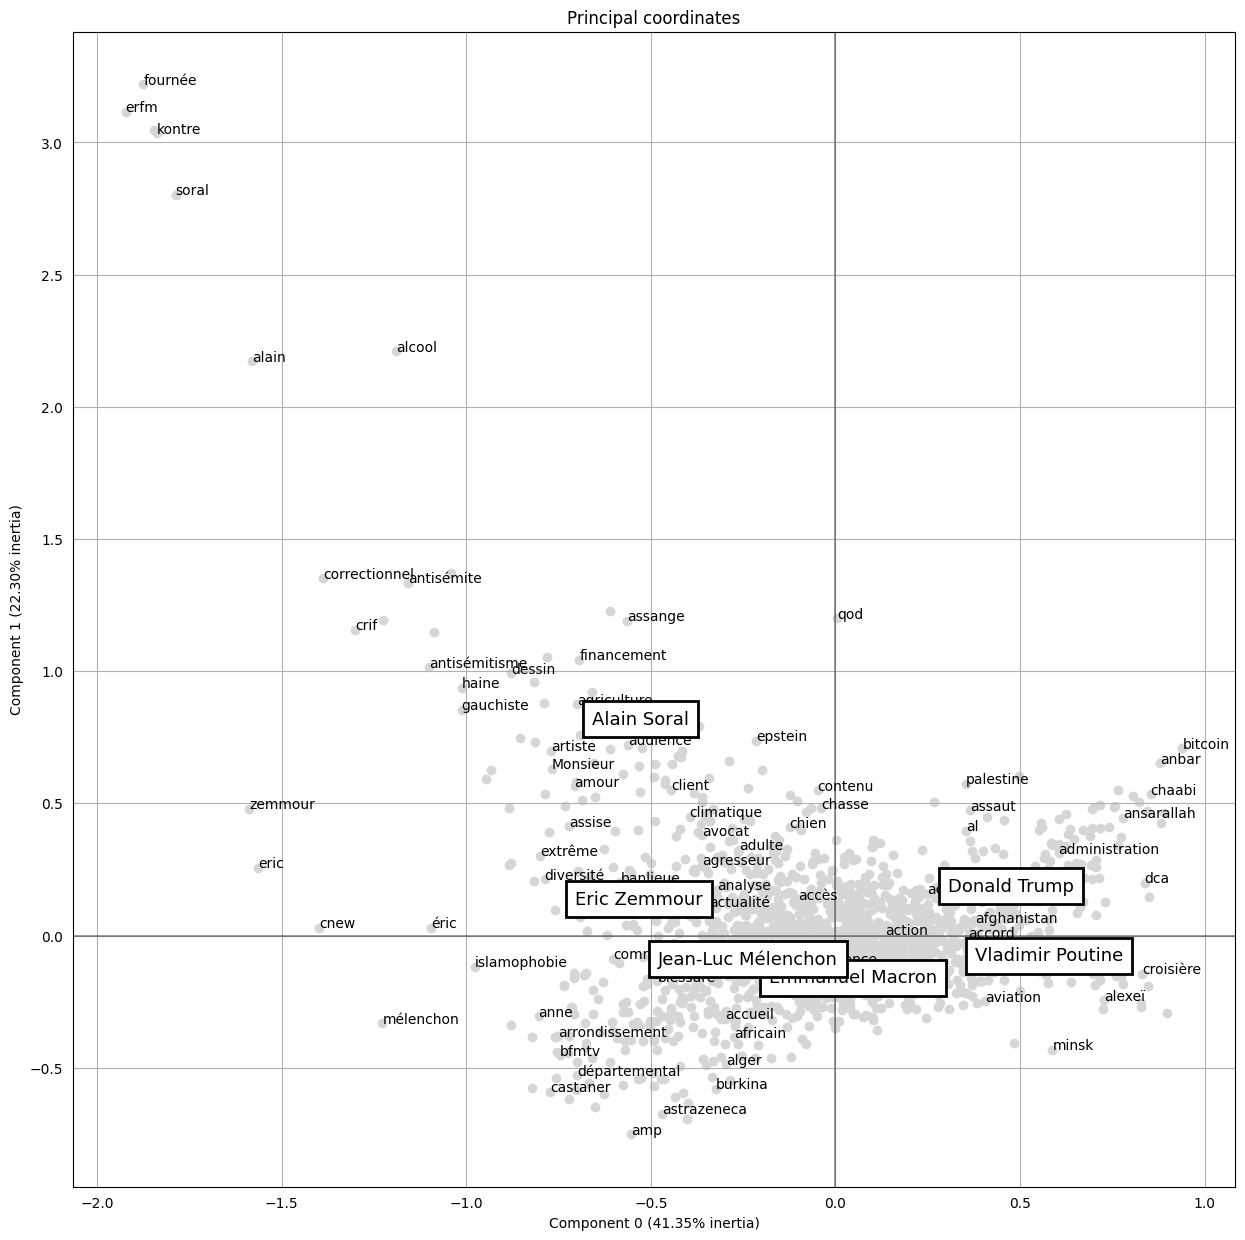

In [83]:
ax, texts, sites, x_row, y_row, row_names = ca.plot_coordinates(
    X=dataFrame,
    ax=None,
    figsize=(15, 15),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True,
 )
res = process(texts, threshold=(0.20, 0.050))
for x, y, label in res:
    ax.annotate(label, (x, y))#, va='center', ha='center')

for xi, yi, label in sites:
    ax.annotate(label, (xi, yi), size=13, bbox=dict(boxstyle="square,pad=0.5", fc="white", ec="black", lw=2))
ax.get_figure().savefig('../img/CA-ALL-PER-AND-KWS.svg')

Clustering data

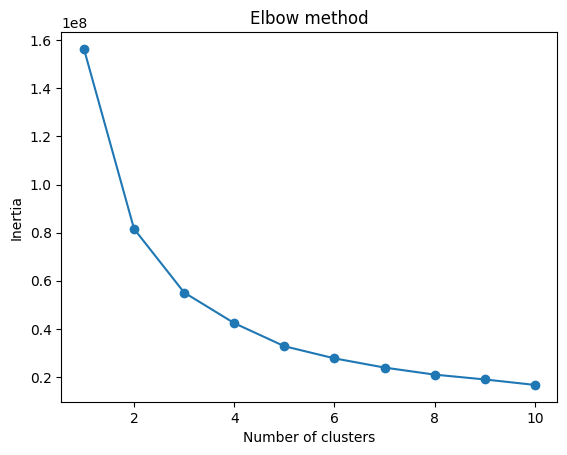

In [84]:
from sklearn.cluster import KMeans

data = dataFrame
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [85]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)


KMeans(n_clusters=4)

In [86]:
len(row_names)

1630

In [87]:
colors = np.full(len(row_names), np.nan)

In [88]:
for i, c in enumerate(kmeans.labels_):
    colors[row_names.index(kws_list[i])] = c

In [89]:
np.sum(np.isnan(colors))

0

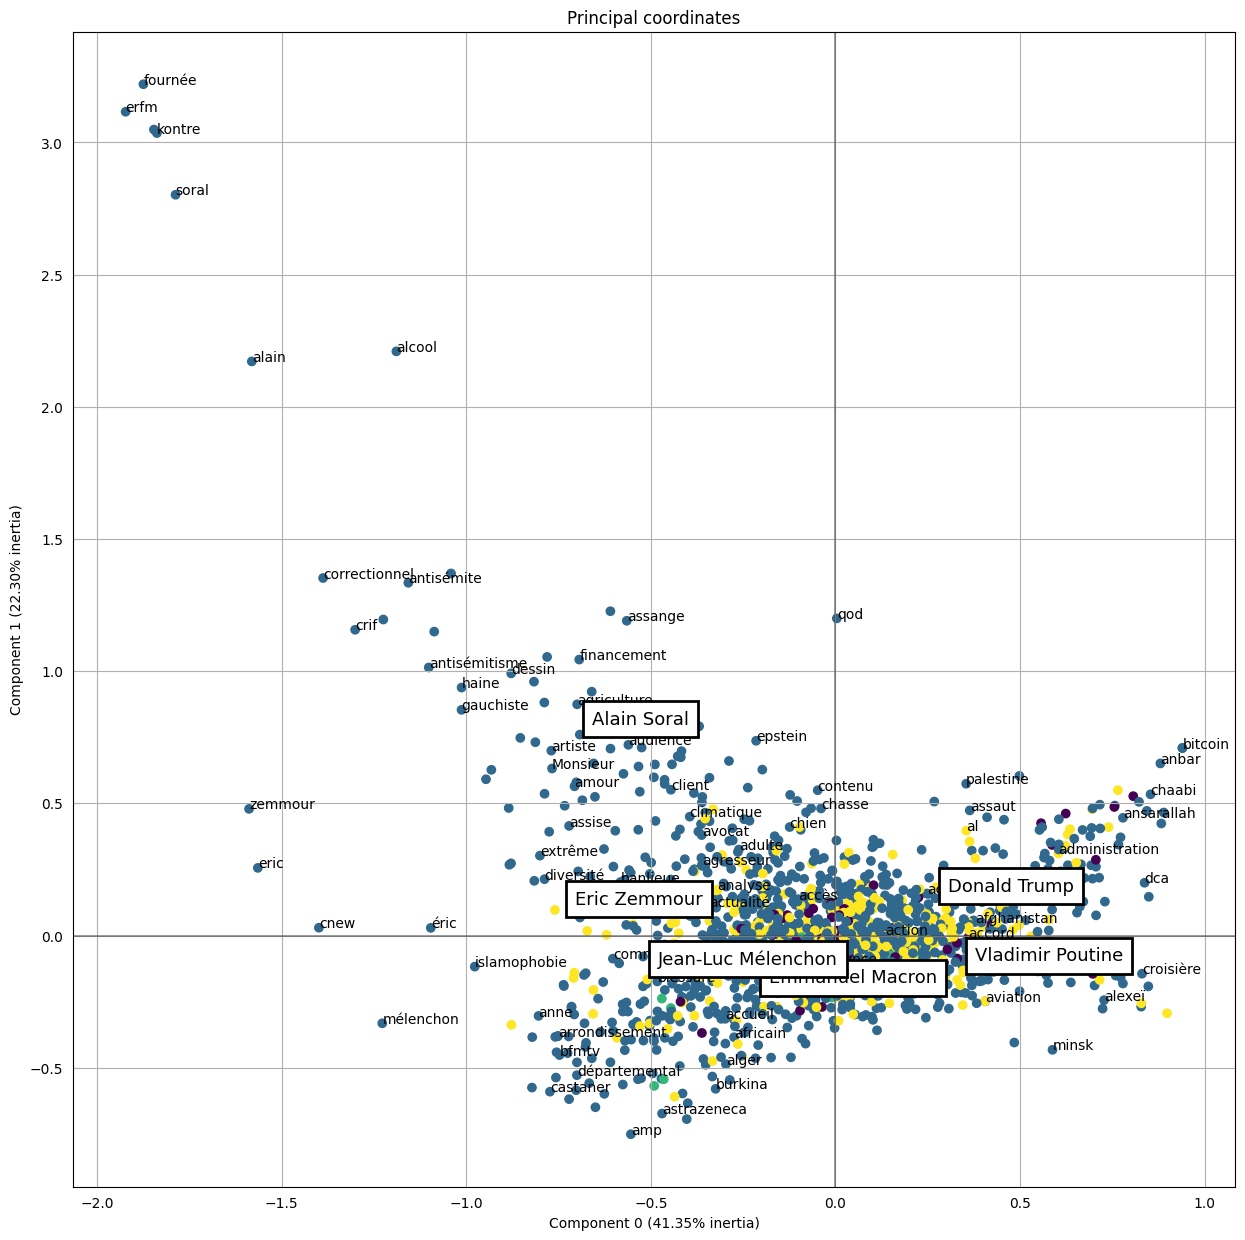

In [90]:
def plot_coordinates(self, X, ax=None, figsize=(6, 6), x_component=0, y_component=1,
                     show_row_labels=True, show_col_labels=True, **kwargs):
    """Plot the principal coordinates."""

    self._check_is_fitted()

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    # Add style
    ax = plot.stylize_axis(ax)

    # Get labels and names
    row_label, row_names, col_label, col_names = util.make_labels_and_names(X)

    # Plot row principal coordinates
    row_coords = self.row_coordinates(X)

    x_row = row_coords[x_component]
    y_row = row_coords[y_component]

    ax.scatter(
        row_coords[x_component],
        row_coords[y_component],
        **kwargs,
        label=row_label,
        c=colors
    )

    # Plot column principal coordinates
    col_coords = self.column_coordinates(X)
    ax.scatter(
        col_coords[x_component],
        col_coords[y_component],
        **kwargs,
        label=col_label
    )

    texts = []
    # Add row labels
    if show_row_labels:
        x = row_coords[x_component]
        y = row_coords[y_component]
        for xi, yi, label in zip(x, y, row_names):
            # ax.annotate(label, (xi, yi))
            texts.append((xi, yi, label))

    sites = []
    # Add column labels
    if show_col_labels:
        x = col_coords[x_component]
        y = col_coords[y_component]
        for xi, yi, label in zip(x, y, col_names):
            sites.append((xi, yi, label))

    # Text
    ax.set_title('Principal coordinates')
    ei = self.explained_inertia_
    ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(x_component, 100 * ei[x_component]))
    ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(y_component, 100 * ei[y_component]))

    return ax, texts, sites, x_row, y_row


prince.CA.plot_coordinates = plot_coordinates

import itertools


def process(input_list, threshold=(10, 10)):
    combos = itertools.combinations(input_list, 2)
    points_to_remove = [point2
                        for point1, point2 in combos
                        if abs(point1[0] - point2[0]) <= threshold[0] and abs(point1[1] - point2[1]) <= threshold[1]]
    points_to_keep = [point for point in input_list if point not in points_to_remove]
    return points_to_keep


ax, texts, sites, x_row, y_row = ca.plot_coordinates(
    X=dataFrame,
    ax=None,
    figsize=(15, 15),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True,
)
res = process(texts, threshold=(0.20, 0.050))
for x, y, label in res:
    ax.annotate(label, (x, y))  #, va='center', ha='center')

for xi, yi, label in sites:
    ax.annotate(label, (xi, yi), size=13, bbox=dict(boxstyle="square,pad=0.5", fc="white", ec="black", lw=2))
ax.get_figure().savefig('../img/CA-ALL-PER-AND-KWS-WITH-CLUSTERING.svg')
